# Data Science approach for analysis of prediction survival on the Titanic (competition on the Kaggle platform)

### Import necessary libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# datasets
df_train = pd.read_csv('C:\\Users\\User\\Desktop\\titanic\\train.csv')
df_test = pd.read_csv("C:\\Users\\User\\Desktop\\titanic\\test.csv")
df = pd.read_csv("C:\\Users\\User\\Desktop\\titanic\\gender_submission.csv")

In [4]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Statistical datas of datasets:

In [6]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
df_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [8]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### according statistical datas:
- 'PassengerId' shows that 891 passengers were on Titanic
- 'Age','Cabin' and 'Embarked' have missing values
- the mean of 'Survived' is 38%
- 'Age' shows that 75% of passengers were younger than 39 years old
- The means of 'Pclass' and 'Fare' show that most of the passengers bought chip tickets
- 'Parch' shows that most of passenger were along

In [10]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [11]:
df_test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


### according statistics of dataset`s object:
- all names are unique
- 'Cabin' and 'Embarked' have missing values
- famale passengers 891+418-(577+266)=466

## Key Questions for the Data Analysis

In [12]:
def pivot_survival_rate(df_train, target_column):
    df_pivot = pd.pivot_table(
        df_train[['PassengerId', target_column, 'Survived']],
        index=[target_column],
        columns=['Survived'],
        aggfunc='count',
        fill_value=0)\
        .reset_index()

    df_pivot.columns = [target_column,'not_survived', 'survived']

    df_pivot['passengers'] = df_pivot['not_survived']+df_pivot['survived']

    df_pivot['survival_rate'] = df_pivot['survived']/df_pivot['passengers']*100
    print(df_pivot.to_markdown())

## Had Older Passengers and Children Chance of Survival?


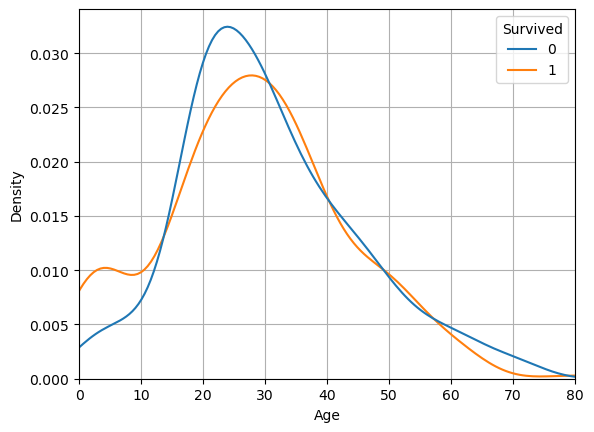

In [13]:
sns.kdeplot(data=df_train, x='Age', hue='Survived', common_norm=False)
plt.xlim(0,df_train['Age'].max())
plt.grid()
plt.show()

#### For result: we see that Children (blue line) under 12 years have higher survival chance than not to survive, for passengers older the 60 years(orange line), the chance to survive reduces very fast

In [14]:
def age_category(row):
    if row < 12:
        return 'children'
    if (row>=12) & (row<60):
        return 'adult'
    if row >=60:
        return 'senior'
    else:
        return 'no age'

df_train['Age_category'] = df_train['Age'].apply(lambda row: age_category(row))
df_test['Age_category'] = df_test['Age'].apply(lambda row: age_category(row))

In [15]:
df_train['Age_category']

0       adult
1       adult
2       adult
3       adult
4       adult
        ...  
886     adult
887     adult
888    no age
889     adult
890     adult
Name: Age_category, Length: 891, dtype: object

In [16]:
pivot_survival_rate(df_train,'Age_category')

|    | Age_category   |   not_survived |   survived |   passengers |   survival_rate |
|---:|:---------------|---------------:|-----------:|-------------:|----------------:|
|  0 | adult          |            376 |        244 |          620 |         39.3548 |
|  1 | children       |             29 |         39 |           68 |         57.3529 |
|  2 | no age         |            125 |         52 |          177 |         29.3785 |
|  3 | senior         |             19 |          7 |           26 |         26.9231 |


### Result: Children have a higher survival rate(57%), than older 60 years (27%)

## Had Passengers of a Higher Pclass also a Higher Chanсe of Survival?

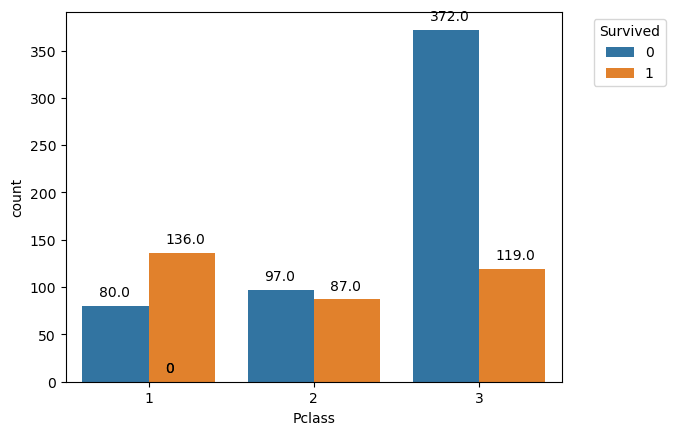

In [17]:
ax=sns.countplot(data=df_train, x='Pclass', hue='Survived')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),(p.get_x() + 0.1, p.get_height() + 10))
ax.legend(title='Survived', bbox_to_anchor=(1.05, 1), loc = 'upper left')
plt.show()

In [18]:
pivot_survival_rate(df_train,'Pclass')

|    |   Pclass |   not_survived |   survived |   passengers |   survival_rate |
|---:|---------:|---------------:|-----------:|-------------:|----------------:|
|  0 |        1 |             80 |        136 |          216 |         62.963  |
|  1 |        2 |             97 |         87 |          184 |         47.2826 |
|  2 |        3 |            372 |        119 |          491 |         24.2363 |


### From the bar we see that the most survival passengers are from 1 class(63%) and the lowest rate has 3 class(24%), despite there are more passengers from 3 class

## Did Passenger that Paid a Higher Fare also had a Higher Survival Rate?

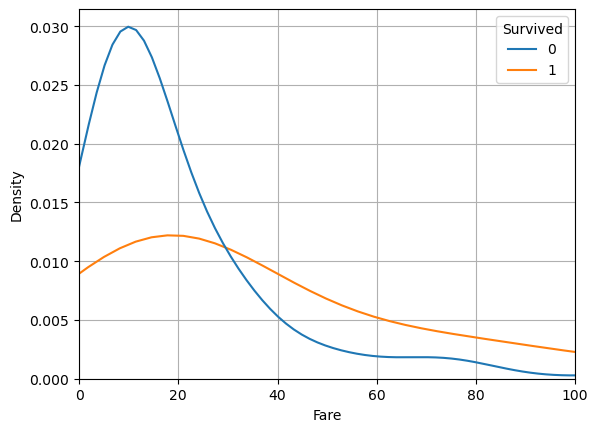

In [19]:
sns.kdeplot(data=df_train,x='Fare',hue='Survived', common_norm=False)
plt.grid()
plt.xlim(0,100)
plt.show()

#### If a passengers paid a fare higher then 30, the chance to survive was higher than to not survive the Titanic

## Did women have a higher chance of survival?

In [20]:
pivot_survival_rate(df_train,'Sex')

|    | Sex    |   not_survived |   survived |   passengers |   survival_rate |
|---:|:-------|---------------:|-----------:|-------------:|----------------:|
|  0 | female |             81 |        233 |          314 |         74.2038 |
|  1 | male   |            468 |        109 |          577 |         18.8908 |


#### The survival rate of female(74%) is much higher compared to the male(19%)

## Did the port of embarkation influence the survival Rate?

In [21]:
pivot_survival_rate(df_train,'Embarked')

|    | Embarked   |   not_survived |   survived |   passengers |   survival_rate |
|---:|:-----------|---------------:|-----------:|-------------:|----------------:|
|  0 | C          |             75 |         93 |          168 |         55.3571 |
|  1 | Q          |             47 |         30 |           77 |         38.961  |
|  2 | S          |            427 |        217 |          644 |         33.6957 |


### Most of passengers embarced in S-port and have the lowest survival rate. The highest survival rate have passengers that embarced in C-port.

## Survival rate of Sex and Pclass

### Analisis shows that Sex and Pclass influence on the survival rate. Using Catplot bar we would like to see the combined influence of Sex and Pclass on the survival rate:

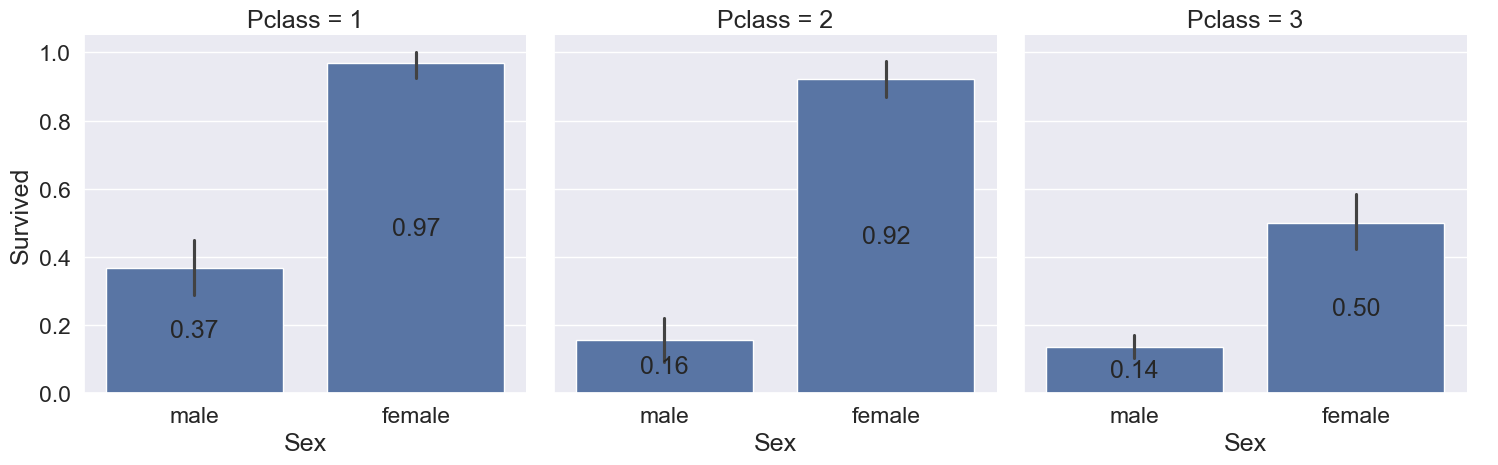

In [22]:
sns.set(font_scale=1.5)
g=sns.catplot(x='Sex', y='Survived', col='Pclass', data=df_train, kind='bar')

for i in range(3):
    ax=g.facet_axis(0,i)
    for c in ax.containers:
        labels=[f'{(v.get_height()):.2f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='center')
plt.show()

### Results:
- Almost all females from 1(97%) and 2(92%) classes survived
- Females from 3(50%) class has higher survival rate than each males rate
- Males from 1(37%) class has twice higher survival rate than from 2 and 3 classes 
- Sex influence more than Pclass on survival rate

## Survival rate of Age and Pclass

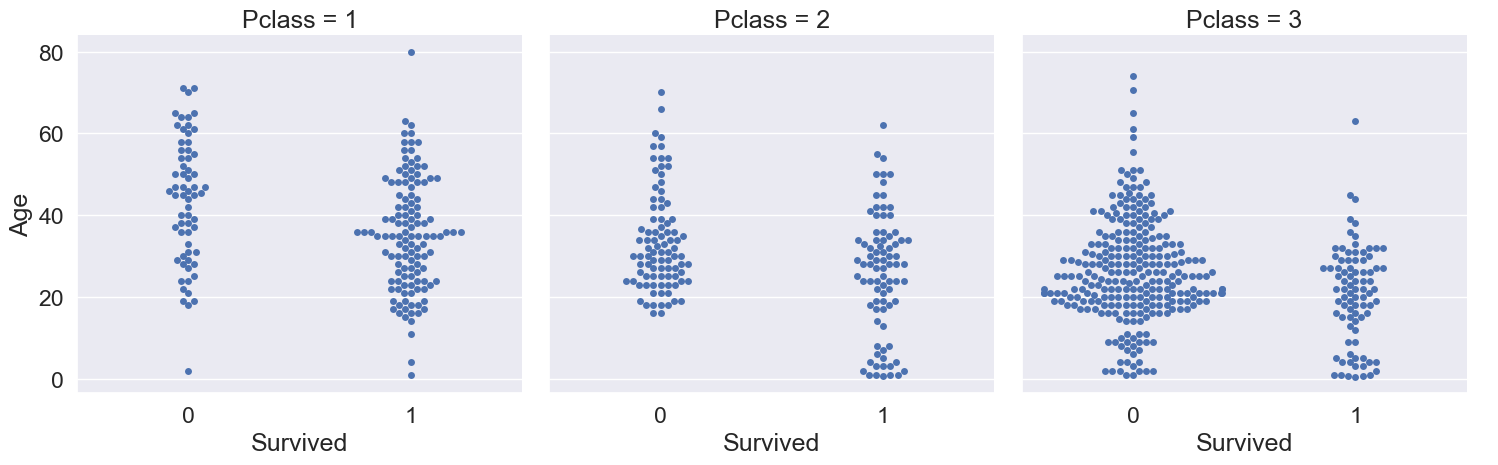

In [23]:
g=sns.catplot(x='Survived', y='Age', col='Pclass', data=df_train, kind='swarm')
plt.show()

### We saw that almost all young passengers from 1 and 2 classes survived, but a lot of young passengers from 3 class died

## Survival rate for Categorical and Numerical Features:

#### 1. Categorical

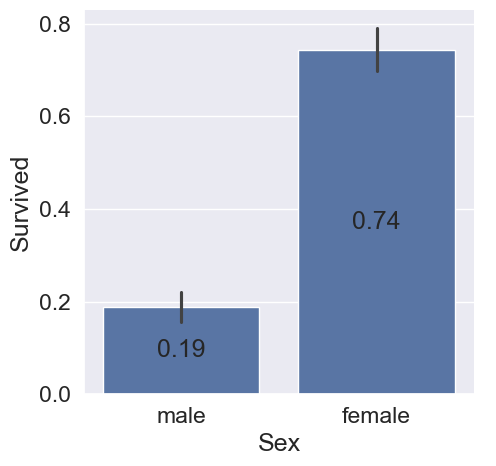

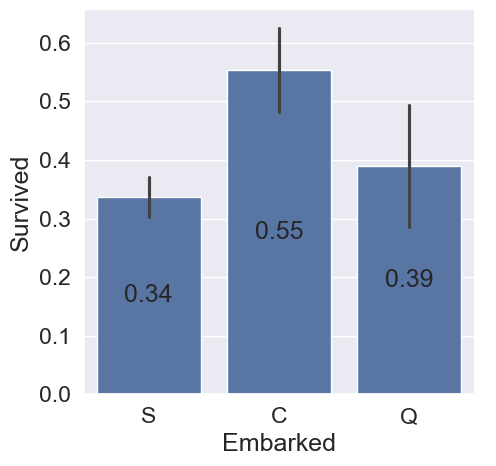

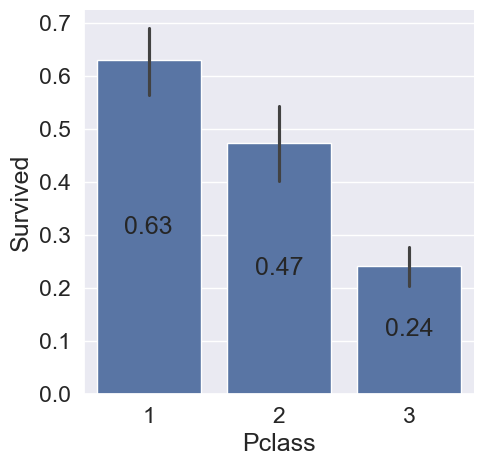

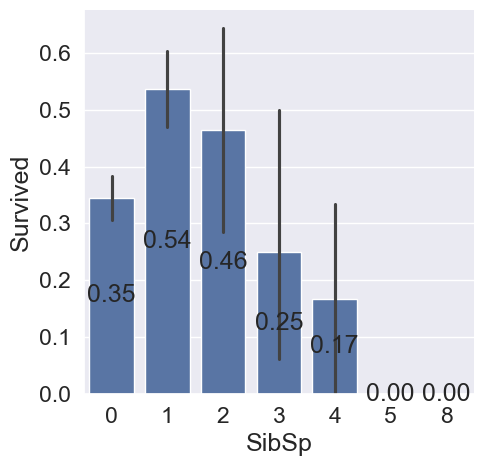

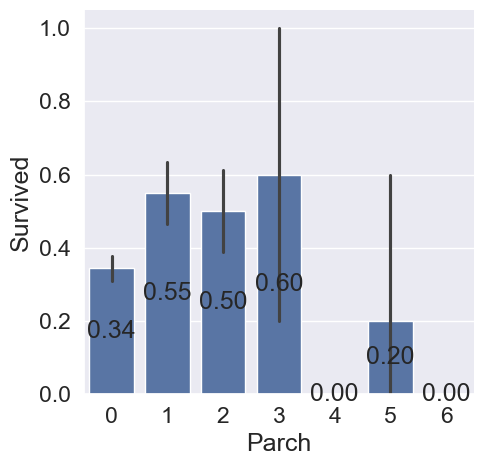

In [24]:
for feature in ['Sex', 'Embarked','Pclass','SibSp', 'Parch']:
    g=sns.catplot(x=feature, y='Survived', data=df_train, kind='bar')
    ax = g.facet_axis(0,-0,1)
    for c in ax.containers:
        labels=[f'{(v.get_height()):.2f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='center')
    plt.show()

#### Results:
- Sex: The survival rate of female(74%) passengers higher than male`s(19%)
- Embarked: The survival rate of passengers embarked in C-port(55%) higher than other's
- Pclass: The survival rate of 1 class higher than other's
- SibSp: The highest survival rate of passengers with 1 sibling or spouse(54%)
- Parch: The survival rate of passengers with 3 relatives is highest

#### 2. Numerical

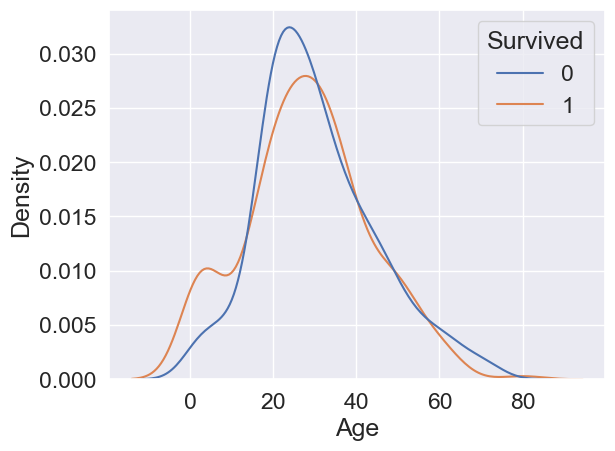

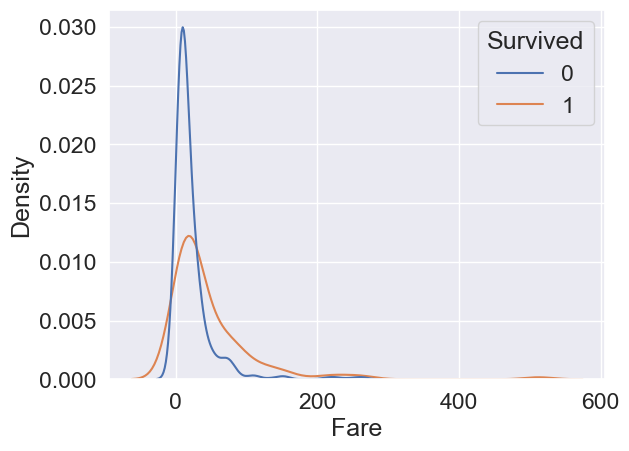

In [25]:
for feature in ['Age', 'Fare']:
    g=sns.kdeplot(data=df_train, x=feature, hue='Survived', common_norm=False)
    plt.show()

#### Results:
- Age: Chances of survival of children below 12 years very high, if passenger older than the 60, the survive rate reduces 
- Fare: Chances of survival of passengers paied 30, higher than other`s 

## Visualisation:

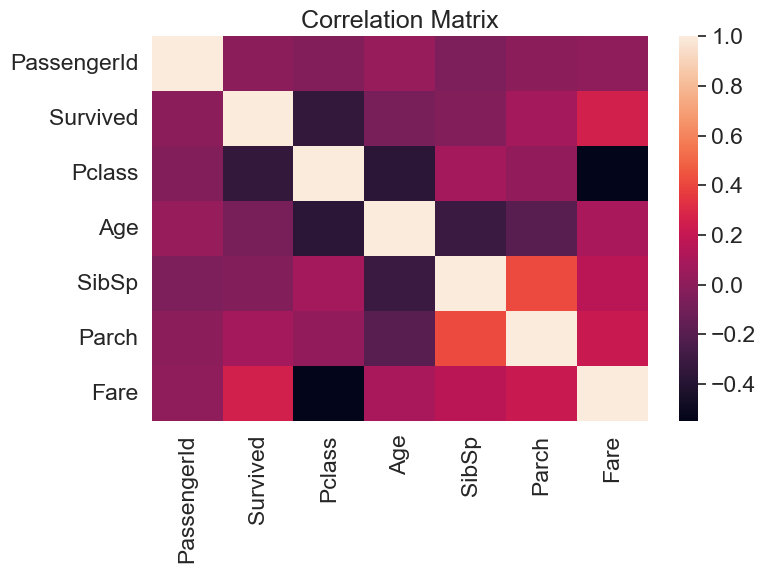

In [26]:
plt.figure(figsize=(8, 5))
sns.heatmap(df_train.corr(numeric_only=True))
plt.title("Correlation Matrix")
plt.show()

#### Correlation result:
Correlation matrix shows high negatively correlation between Pclass and Survived. 
The high possitive correlation between Survived and Fare.
This explains that survived passengers was privilegent than other.

# Training and testing:

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(df_train,df_train[['Survived','Pclass','Sex']]):
    strat_train_set= df_train.loc[train_indices]
    strat_test_set= df_train.loc[test_indices]

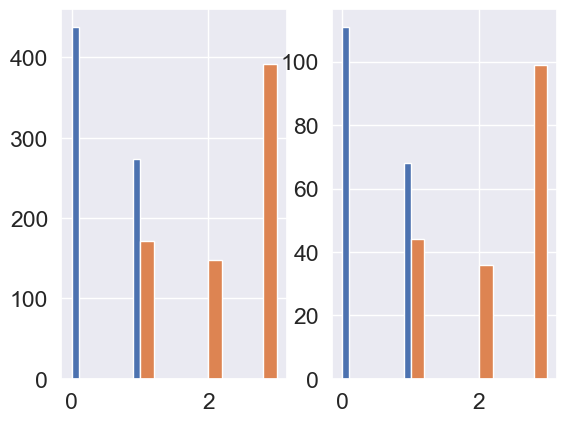

In [28]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()
plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()
plt.show()

#### Histograms show that train and test datas have equal distribution

### Data Preprocessing:
- Data cleaning
- Feature Engineer

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        imputer=SimpleImputer(strategy='mean')
        X['Age']=imputer.fit_transform(X[['Age']])
        return X

In [30]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        encoder=OneHotEncoder()
        matrix=encoder.fit_transform(X[['Embarked']]).toarray()
        column_names=['C','S','Q','N']
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        matrix=encoder.fit_transform(X[['Sex']]).toarray()
        column_names=['Female', 'Male']
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        return X

In [31]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self, X):
        return X.drop(['Embarked', 'Name', 'Ticket', 'Cabin', 'Sex', 'Age_category','N'], axis=1,errors='ignore')
        
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('ageimputer', AgeImputer()),
                     ('featureencoder', FeatureEncoder()),
                     ('feauterdropper', FeatureDropper())])

### Functions above fill missing Age features to mean, create Numerical features from Categorical, drop Categorical features

In [32]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [33]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
181,182,0,2,29.686736,0,0,15.0500,1.0,0.0,0.0,0.0,1.0
635,636,1,2,28.000000,0,0,13.0000,0.0,0.0,1.0,1.0,0.0
325,326,1,1,36.000000,0,0,135.6333,1.0,0.0,0.0,1.0,0.0
144,145,0,2,18.000000,0,0,11.5000,0.0,0.0,1.0,0.0,1.0
336,337,0,1,29.000000,1,0,66.6000,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,0,1,28.000000,0,0,47.1000,0.0,0.0,1.0,0.0,1.0
533,534,1,3,29.686736,0,2,22.3583,1.0,0.0,0.0,1.0,0.0
817,818,0,2,31.000000,1,1,37.0042,1.0,0.0,0.0,0.0,1.0
847,848,0,3,35.000000,0,0,7.8958,1.0,0.0,0.0,0.0,1.0


In [34]:
from sklearn.preprocessing import StandardScaler
X=strat_train_set.drop(['Survived'],axis=1)
y=strat_train_set['Survived']
scaler=StandardScaler()
X_data=scaler.fit_transform(X)
y_data=y.to_numpy()

In [35]:
# Random Forest Classifier and cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
param_gird=[
    {'n_estimators': [10,100,200,500],'max_depth':[None,5,10],'min_samples_split':[2,3,4]}
]
grid_search=GridSearchCV(clf,param_gird,cv=3,scoring='accuracy',return_train_score=True)
grid_search.fit(X_data,y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [36]:
final_clf=grid_search.best_estimator_

In [37]:
final_clf

RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=10)

In [38]:
strat_test_set=pipeline.fit_transform(strat_test_set)

In [39]:
X_test=strat_test_set.drop(['Survived'],axis=1)
y_test=strat_test_set['Survived']
scaler=StandardScaler()
X_data_test=scaler.fit_transform(X_test)
y_data_test=y_test.to_numpy()

In [40]:
final_clf.score(X_data_test,y_data_test)

0.7988826815642458

#### Accuracy of cross validation = 80%(good score). It shows how good our predictions.

In [41]:
final_data=pipeline.fit_transform(df_train)

In [42]:
X_final=final_data.drop(['Survived'],axis=1)
y_final=final_data['Survived']
scaler=StandardScaler()
X_data_final=scaler.fit_transform(X_final)
y_data_final=y_final.to_numpy()

In [43]:
prod_clf = RandomForestClassifier()
param_gird=[
    {'n_estimators': [10,100,200,500],'max_depth':[None,5,10],'min_samples_split':[2,3,4]}
]
grid_search=GridSearchCV(prod_clf,param_gird,cv=3,scoring='accuracy',return_train_score=True)
grid_search.fit(X_data_final,y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [44]:
prod_final_clf=grid_search.best_estimator_

In [45]:
final_test_data=pipeline.fit_transform(df_test)

In [46]:
X_final_test=final_test_data
X_final_test=X_final_test.ffill()

scaler=StandardScaler()
X_data_final_test=scaler.fit_transform(X_final_test)

In [47]:
predictions = prod_final_clf.predict(X_data_final_test)

### Final prediction built on RandomForestClassifier and saved as prediction(final_df)

In [48]:
final_df=pd.DataFrame(df_test['PassengerId'])
final_df['Survived']=predictions
final_df.to_csv('C:\\Users\\User\\Desktop\\titanic\\prediction.csv',index=False)

In [49]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [50]:
# Created a new data set for comparison Survived features with Prediction
df_new = pd.DataFrame()

In [51]:
df_new=df

In [52]:
df_new['Prediction']=final_df['Survived']

In [53]:
df_new

,PassengerId,Survived,Prediction
0,892,0,0
1,893,1,0
2,894,0,0
3,895,0,0
4,896,1,1
...,...,...,...
413,1305,0,0
414,1306,1,1
415,1307,0,0
416,1308,0,0


In [58]:
# Survived features comparing to Prediction have this diffrence:
df_new[df_new['Survived']!=df_new['Prediction']]

,PassengerId,Survived,Prediction
1,893,1,0
80,972,0,1
89,981,0,1
132,1024,1,0
140,1032,1,0
161,1053,0,1
188,1080,1,0
194,1086,0,1
196,1088,0,1
201,1093,0,1


## There are small difference between Survived and Prediction features, this shows that our model works good and could predict high accurate model.